## Problem-1 Proof

$f(x_{i+1}) = f(x_{i}) + f^{\prime}(x_{i})h + f^{\prime\prime}(x_{i})h^2 + R_2$     ...(1) 

$f(x_{i-1}) = f(x_{i}) - f^{\prime}(x_{i})h + f^{\prime\prime}(x_{i})h^2 - R^{\prime}_2$     ...(2)

$(1) - (2) = f(x_{i+1}) - f(x_{i-1}) = 2hf^{\prime}(x_{i}) + R_2 + R^{\prime}_2$

$\therefore f^{\prime}(x_{i}) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + \frac{R_2 + R^{\prime}_2}{2h}$

$\because R_2 + R^{\prime}_2 = \frac{f^{\prime\prime\prime}(\xi)}{3!}h^3  + \frac{f^{\prime\prime\prime}(\xi^{\prime})}{3!}h^3 = O(h^3)$

$\therefore  f^{\prime}(x_{i}) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + O(h^2)$

## Problem-2
### Part a

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
epsilon_symbol = '\u03B5'
# from math import log, sin, cos, exp, pi
from numpy import cos, sin, exp, pi

def Funny_function(x):
    return 10*cos(1.5*pi*x) * exp(-x) + x**6 - 1

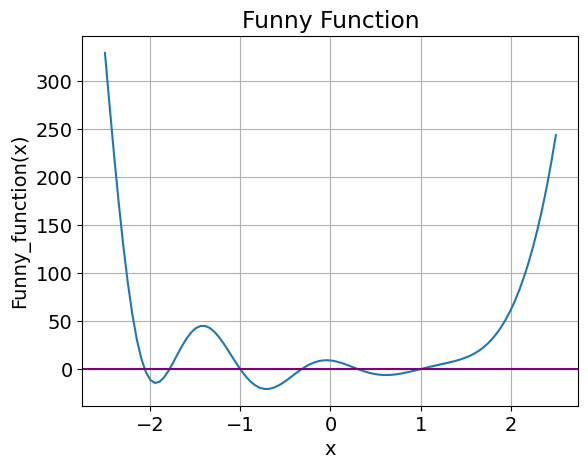

In [12]:
x_grid = np.linspace(-2.5, 2.5, 100)
y_grid = Funny_function(x_grid)
# print(y_grid)

plt.plot(x_grid, y_grid)
plt.axhline(y=0, color='purple', linestyle='--')  # 繪製 x 軸
plt.xlabel('x')  # 標註 x 軸的名稱
plt.ylabel('Funny_function(x)')  # 標註 y 軸的名稱
plt.title('Funny Function')  # 圖的標題
plt.grid(True)  # 顯示網格
plt.show()

### Part a Figure 解釋
在 [-2.5, 2.5] 之外必定有根，因為 cos 這個函數會在 [-1, 1] 之間一直跳動，會使得這個 funny function 的值正負區間跳動，當連續函數的值有正負的變化時，則會有解在這個區間(By 勘根定理)

### Part b

In [13]:
def Bisection_Method(X_l, X_u):
    Present_Approx = np.array(0)
    Previous_Approx = np.array(0)
    E_a = 1
    E_s = 1e-2

    iter = 0
    track = pd.DataFrame(
            {'iter': [],
              'E_a': [],
              'X_l': [],
              'X_u': [],
                'M': []}
            )    
    # print(track)
    while E_a > E_s:
        M = np.array((X_l + X_u) / 2)
        Previous_Approx = Present_Approx
        Present_Approx = M
        # print(Present_Approx,Previous_Approx)
        E_a = abs((Present_Approx - Previous_Approx))*100 / abs(Present_Approx)
        # print(Present_Approx,Previous_Approx)
        # print(f"iter: {iter},    E_a: {E_a:.4f},    X_l: {X_l},    X_u: {X_u},    M: {M}")
        new_row = {"iter": iter, "E_a": E_a, "X_l": X_l, "X_u": X_u, "M": M}
        track.loc[len(track)] = new_row
        Sign_Flag = np.array(['+','+','+'])

        Y_l = Funny_function(X_l)
        Y_M = Funny_function(M)
        Y_u = Funny_function(X_u)
        Y = [Y_l, Y_M, Y_u]
        
        for index, y in enumerate(Y):
            if y < 0:
                Sign_Flag[index] = '-'
        # print(Sign_Flag)
        
        if Sign_Flag[1] == Sign_Flag[0]:
            X_l = M
            
        if Sign_Flag[1] == Sign_Flag[2]:
            X_u = M
               
        iter = iter + 1
    
    Formatted_df = track[['E_a', 'X_l', 'X_u', 'M']].applymap(lambda x: '%.6f' % x)
    Formatted_df.insert(0, 'iter', track['iter'])
    print(Formatted_df.to_string(index=False))
    
    plt.rcParams.update({'font.size': 14})
    plt.xlabel('iteration')  # 標註 x 軸的名稱
    plt.ylabel(f'{epsilon_symbol}$_a$(%)')  # 標註 y 軸的名稱
    plt.title('Bisection Error')  # 圖的標題
    plt.grid(True)  # 顯示網格
    plt.plot([x+1 for x in range(len(track))], track['E_a'],label='Bisection')
    plt.legend()
    
def False_Position(X_l, X_u):
    Present_Approx = np.array(0)
    Previous_Approx = np.array(0)
    E_a = 1
    E_s = 1e-2

    iter = 0
    track = pd.DataFrame(
            {'iter': [],
              'E_a': [],
              'X_l': [],
              'X_u': [],
              'X_r': []}
            )    
    # print(track)
    while E_a > E_s:
      Y_u = Funny_function(X_u)
      Y_l = Funny_function(X_l)
      # print(Y_u, Y_l)
      X_r = X_u - (Y_u * (X_u - X_l) / (Y_u - Y_l))
      # print(X_r)
      Y_r = Funny_function(X_r)
      Previous_Approx = Present_Approx
      Present_Approx = X_r
      if Y_r != 0:
        if Y_l * Y_r < 0:
          X_u = X_r
        else:
          X_l = X_r 
      
      E_a = abs((Present_Approx - Previous_Approx))*100 / abs(Present_Approx)
      new_row = {"iter": iter, "E_a": E_a, "X_l": X_l, "X_u": X_u, "X_r": X_r}
      track.loc[len(track)] = new_row
      iter = iter + 1
      
    Formatted_df = track[['E_a', 'X_l', 'X_u', 'X_r']].applymap(lambda x: '%.6f' % x)
    Formatted_df.insert(0, 'iter', track['iter'])
    print(Formatted_df.to_string(index=False))

    plt.rcParams.update({'font.size': 14})
    plt.xlabel('iteration')  # 標註 x 軸的名稱
    plt.ylabel(f'{epsilon_symbol}$_a$(%)')  # 標註 y 軸的名稱
    plt.title('False Position Error')  # 圖的標題
    plt.grid(True)  # 顯示網格
    plt.plot([x+1 for x in range(len(track))], track['E_a'], label='False Position')
    plt.legend()
    

 iter        E_a      X_l      X_u        M
    0 100.000000 0.000000 0.500000 0.250000
    1  33.333333 0.250000 0.500000 0.375000
    2  20.000000 0.250000 0.375000 0.312500
    3  11.111111 0.250000 0.312500 0.281250
    4   5.263158 0.281250 0.312500 0.296875
    5   2.564103 0.296875 0.312500 0.304688
    6   1.298701 0.296875 0.304688 0.300781
    7   0.645161 0.300781 0.304688 0.302734
    8   0.321543 0.302734 0.304688 0.303711
    9   0.160514 0.303711 0.304688 0.304199
   10   0.080192 0.304199 0.304688 0.304443
   11   0.040080 0.304443 0.304688 0.304565
   12   0.020044 0.304443 0.304565 0.304504
   13   0.010023 0.304443 0.304504 0.304474
   14   0.005011 0.304474 0.304504 0.304489
 iter        E_a      X_l      X_u      X_r
    0 100.000000 0.000000 0.315276 0.315276
    1   4.210537 0.302538 0.315276 0.302538
    2   0.647216 0.302538 0.304509 0.304509
    3   0.004920 0.302538 0.304494 0.304494


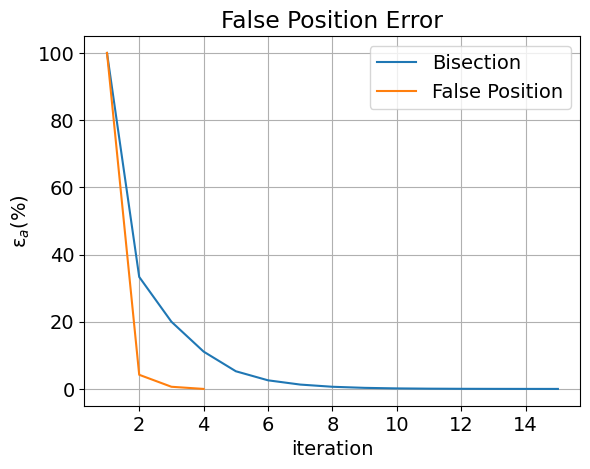

In [14]:
Bisection_Method(np.array(0), np.array(0.5))
False_Position(np.array(0), np.array(0.5))
plt.show()

### Part b Figure 解釋
從圖中可明顯觀察到，在使用 funny function 的情況下 False Position 的收斂速度遠大於 Bisection，Bisection花了 15 次的 iteration，False Position 則花了 4 次

### Part c

 iter        E_a      X_l      X_u        M
    0 100.000000 0.500000 2.000000 1.250000
    1  42.857143 0.500000 1.250000 0.875000
    2  17.647059 0.875000 1.250000 1.062500
    3   9.677419 0.875000 1.062500 0.968750
    4   4.615385 0.968750 1.062500 1.015625
    5   2.362205 0.968750 1.015625 0.992188
    6   1.167315 0.992188 1.015625 1.003906
    7   0.587084 0.992188 1.003906 0.998047
    8   0.292683 0.998047 1.003906 1.000977
    9   0.146556 0.998047 1.000977 0.999512
   10   0.073224 0.999512 1.000977 1.000244
   11   0.036626 0.999512 1.000244 0.999878
   12   0.018309 0.999878 1.000244 1.000061
   13   0.009156 0.999878 1.000061 0.999969
 iter        E_a      X_l      X_u      X_r
    0 100.000000 0.618198 2.000000 0.618198
    1  16.947705 0.744348 2.000000 0.744348
    2  11.719313 0.843161 2.000000 0.843161
    3   6.933503 0.905976 2.000000 0.905976
    4   3.960540 0.943338 2.000000 0.943338
    5   2.298554 0.965531 2.000000 0.965531
    6   1.363180 0.978875 2.0000

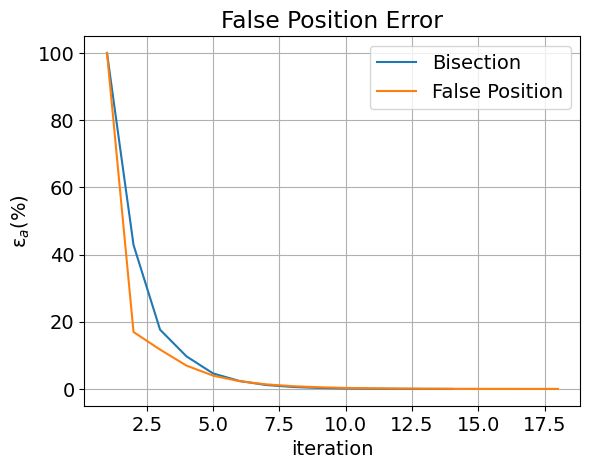

In [15]:
Bisection_Method(np.array(0.5), np.array(2))
False_Position(np.array(0.5), np.array(2))

### Part c Figure 解釋
即使現在區間換成 [0.5, 2] 在 funny function 的表現上，依然是 False position收斂的速度比 Bisection 快。

## Problem 3
### Part a b c d

In [16]:
def Rotate_Vector(v, angle):
    Rotate_Matrix = np.array([[0, 0, 0],
                             [0, 0, sin(angle)],
                             [0, 0, cos(angle)]])
    return Rotate_Matrix @ v 
def Modulation(t, S, T_1, T_2):
    D1 = np.array([[exp(-(t/T_2)), 0, 0],
                             [0, exp(-(t/T_2)), 0],
                             [0, 0, exp(-(t/T_1))]])
    D2 = np.array([[0, 0, 1 - exp(-(t/T_1))]]).T
    return D1 @ S + D2

def Clean_Up(S):
    Clean_Mask = np.array([[0, 0, 0],
                           [0, 0, 0],
                           [0, 0, 1]])
    return Clean_Mask @ S

def Get_Sxy(S):
    return np.sqrt(S[0]**2 + S[1]**2)

def f(theta, t, S, T_1, T_2):  
    for i in range(500):
        S = Rotate_Vector(S, theta)
        S = Modulation(t, S, T_1, T_2)
        if i == 499:
            return Get_Sxy(S)
        S = Clean_Up(S)
    # print(S)
    return S

### Part e

最大值的角度: 32(度)


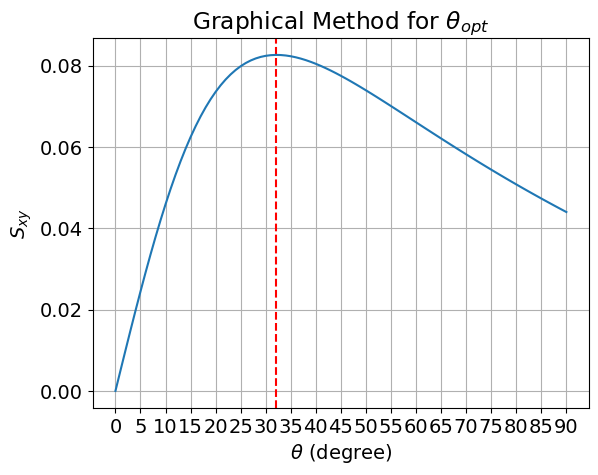

In [17]:
Result_By_Angle = []
for i in range(91):
    S = np.array([[0, 0, 1]]).T
    theta = (i / 180) * pi
    Result_By_Angle.append(f(theta, 250, S, 1500, 200))


Result_By_Angle = np.array(Result_By_Angle)
max_index = np.argmax(Result_By_Angle)
print(f"最大值的角度: {max_index}(度)")
# print(Result_By_Angle)
plt.xticks(range(0, 91, 5))
plt.rcParams.update({'font.size': 14})
plt.axvline(x=max_index, color='red', linestyle='--')  # 繪製 y 軸
plt.xlabel(r'$\theta$ (degree)')  # 標註 x 軸的名稱
plt.ylabel(r'$S_{xy}$')  # 標註 y 軸的名稱
plt.title(r'Graphical Method for $\theta_{opt}$')  # 圖的標題
plt.grid(True)  # 顯示網格
plt.plot([x for x in range(91)], Result_By_Angle)
plt.show()

### Part e Figure 解釋
在這張圖中，測試的角度是在 [0, 90] 度這個區間，並且測試的刻度為 1，從結果能看到當 &theta; = 32 時，會產生最大的 $S_{xy}$，因此猜測最佳的 &theta; 會很接近 32。

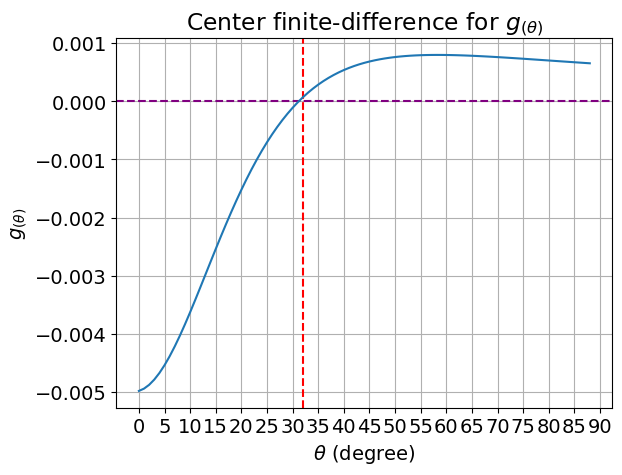

In [18]:
def Center_Difference(a, b, h):
    return (a - b) / (2*h)

G_Of_Theta = [Center_Difference(Result_By_Angle[i-1], Result_By_Angle[i+1], 1) for i in range(1,90)]
index, closest_to_zero = min(enumerate(G_Of_Theta), key=lambda x: abs(x[1] - 0))

plt.rcParams.update({'font.size': 14})
plt.xticks(range(0, 91, 5))
plt.axhline(y=0, color='purple', linestyle='--')  
plt.axvline(x=index+1, color='red', linestyle='--')  
plt.xlabel(r'$\theta$ (degree)')  # 標註 x 軸的名稱
plt.ylabel(r'$g_{(\theta)}$')  # 標註 y 軸的名稱
plt.title(r'Center finite-difference for $g_{(\theta)}$')  # 圖的標題
plt.grid(True)  # 顯示網格
plt.plot([x for x in range(89)], G_Of_Theta)
plt.show()

### Part f Figure 解釋
g(&theta;) 為 f(&theta;) 的一階導數，要求 f(&theta;) 的極值時，要去找一階導數值為 0 的地方，也意味著要找 g(&theta;) = 0 的根，這張圖的一階導數之逼近值，其計算方式使用 centered finite-difference，h 的值設定成一度，EX: g(1度) = (f(2度) - f(0度))/2*(1)，從圖可觀察到當 &theta; 接近 32 時，值會非常的接近 0，也代表 f(&theta;) 在 &theta; = 32 時會有極值(最大值)。

### Part g

In [19]:
PHI = (1 + 5**0.5) / 2

def Golden_Ratio(l, u):
    iter = 0
    track = pd.DataFrame(
            {'iter': [],
              'X_l': [],
              'X_u': [],}
            )
    r = 0
    while 1:
        d = (u - l) * (PHI - 1)
        x1 = l + d
        x2 = u - d

        sol = (x1+x2)/2
        e_a = abs(sol - r) / sol
        new_row = {"iter": iter, "X_l": l, "X_u": u}
        track.loc[len(track)] = new_row
        if e_a < 1e-3:
            break

        S = np.array([[0, 0, 1]]).T
        Y_1 = f((x1)*pi/180, 250, S, 1500, 200)
        Y_2 = f((x2)*pi/180, 250, S, 1500, 200)
        
        if Y_1 > Y_2:
            l = x2
        elif Y_1 < Y_2:
            u = x1

        r = sol
        
        iter = iter + 1
    Formatted_df = track[['X_l', 'X_u']].applymap(lambda x: '%.6f' % x)
    Formatted_df.insert(0, 'iter', track['iter'])
    print(Formatted_df.to_string(index=False))
    return float(track['X_l'].tail(1).item()), float(track['X_u'].tail(1).item())
X_l, X_u = Golden_Ratio(0, 90)
print()


 iter       X_l       X_u
    0  0.000000 90.000000
    1  0.000000 55.623059
    2 21.246118 55.623059
    3 21.246118 42.492236
    4 29.361413 42.492236
    5 29.361413 37.476708
    6 29.361413 34.376941
    7 31.277174 34.376941
    8 31.277174 33.192935
    9 31.277174 32.461180
   10 31.729424 32.461180
   11 32.008930 32.461180
   12 32.008930 32.288436
   13 32.115692 32.288436
   14 32.115692 32.222453
   15 32.115692 32.181674



In [20]:
print(f"Find position:  {(X_l + X_u)/2: .5f}")
print(f"Actual Position: 32.16896")

Find position:   32.14868
Actual Position: 32.16896


### Part h Q&A
可以調低 stop criteria 的值，讓 Golden Section Search 可更接近要找尋的解